# tatanic dataset


In [ ]:
!wget http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt.

--2023-09-12 08:26:06--  http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt.
Resolving biostat.mc.vanderbilt.edu (biostat.mc.vanderbilt.edu)... failed: Name or service not known.
wget: unable to resolve host address ‘biostat.mc.vanderbilt.edu’


In [ ]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

--2023-09-12 08:50:17--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.04s   

2023-09-12 08:50:17 (1.53 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [ ]:
!ls

sample_data  titanic.csv


In [ ]:
!cat titanic.csv

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/

In [ ]:
import csv
import numpy as np
with open('titanic.csv', 'r') as f:
    titanic_reader = csv.reader(f, delimiter=",", quotechar='"')
    row = next(titanic_reader)
    feature_names = np.array(row)
    titanic_x, titanic_y = [], []
    for row in titanic_reader:
        titanic_x.append(row)
        titanic_y.append(row[1])
    titanic_x = np.array(titanic_x)
    titanic_y = np.array(titanic_y)

In [ ]:
print(feature_names)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
print(titanic_x[0])

['1' '0' '3' 'Braund, Mr. Owen Harris' 'male' '22' '1' '0' 'A/5 21171'
 '7.25' '' 'S']


In [ ]:
print(titanic_y[0])

0


In [ ]:
titanic_x = titanic_x[:,[2, 4, 5]]

In [ ]:
feature_names = feature_names[[2, 4, 5]]

In [ ]:
print(feature_names)

['Pclass' 'Sex' 'Age']


In [ ]:
print(titanic_x[12], titanic_y[12])

['3' 'male' '20'] 0


In [ ]:
ages = titanic_x[:, 2]
print(ages)

['22' '38' '26' '35' '35' '' '54' '2' '27' '14' '4' '58' '20' '39' '14'
 '55' '2' '' '31' '' '35' '34' '15' '28' '8' '38' '' '19' '' '' '40' '' ''
 '66' '28' '42' '' '21' '18' '14' '40' '27' '' '3' '19' '' '' '' '' '18'
 '7' '21' '49' '29' '65' '' '21' '28.5' '5' '11' '22' '38' '45' '4' '' ''
 '29' '19' '17' '26' '32' '16' '21' '26' '32' '25' '' '' '0.83' '30' '22'
 '29' '' '28' '17' '33' '16' '' '23' '24' '29' '20' '46' '26' '59' '' '71'
 '23' '34' '34' '28' '' '21' '33' '37' '28' '21' '' '38' '' '47' '14.5'
 '22' '20' '17' '21' '70.5' '29' '24' '2' '21' '' '32.5' '32.5' '54' '12'
 '' '24' '' '45' '33' '20' '47' '29' '25' '23' '19' '37' '16' '24' '' '22'
 '24' '19' '18' '19' '27' '9' '36.5' '42' '51' '22' '55.5' '40.5' '' '51'
 '16' '30' '' '' '44' '40' '26' '17' '1' '9' '' '45' '' '28' '61' '4' '1'
 '21' '56' '18' '' '50' '30' '36' '' '' '9' '1' '4' '' '' '45' '40' '36'
 '32' '19' '19' '3' '44' '58' '' '42' '' '24' '28' '' '34' '45.5' '18' '2'
 '32' '26' '16' '40' '24' '35' '22' '30'

In [ ]:
mean_age = np.mean(titanic_x[ages != '', 2].astype(float))
titanic_x[titanic_x[:,2]=='', 2] = mean_age

In [ ]:
print(mean_age)

29.69911764705882


In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

label_encoder = enc.fit(titanic_x[:, 1])

print("Categorical classes:", label_encoder.classes_)

Categorical classes: ['female' 'male']


In [ ]:
integer_classes = label_encoder.transform(label_encoder.classes_)
print("Integer Classes:", integer_classes)

Integer Classes: [0 1]


In [ ]:
t = label_encoder.transform(titanic_x[:, 1])
titanic_x[:, 1] = t

In [ ]:
print(titanic_x[12], titanic_y[12])

['3' '1' '20'] 0


In [ ]:
print(titanic_x[5], titanic_y[5])

['3' '1' '29.69911764705882'] 0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(titanic_x, titanic_y, test_size=0.25, random_state=33)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [ ]:
clf = clf.fit(x_train, y_train)

In [ ]:
!apt-get -qq install -y graphviz && pip install pydot && pip install StringIO

ERROR: Could not find a version that satisfies the requirement StringIO (from versions: none)
ERROR: No matching distribution found for StringIO


In [ ]:
import pydotplus
from io import StringIO
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=['class', 'sex','age'])

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic.png')
import cv2 as cv


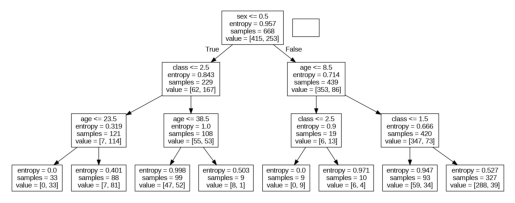

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as image

im = image.imread('titanic.png')
plt.imshow(im)
plt.axis('off')
plt.show()


In [ ]:
!ls

sample_data  titanic.csv  titanic.png


In [ ]:
from sklearn import metrics

def measure_performance(x,y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(x)
    if show_accuracy:
        print(f"accuracy: ", metrics.accuracy_score(y, y_pred))
    if show_classification_report:
        print(f"Classification Report")
        print(metrics.show_classification_report(y,y_pred))
    if show_confussion_matrix:
        print("Confusion Matrix")
        print(metrics.show_confussion_matrix(y, y_pred))


In [ ]:
measure_performance(x_train, y_train, clf, show_classification_report=False, show_confussion_matrix=False)

accuracy:  0.8023952095808383


In [ ]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
from scipy.stats import sem

In [ ]:
print(x_train[:].shape[0])

668


In [ ]:
def loo_cv(x_train, y_train, clf):
    loo = LeaveOneOut(668)
    score = np.zeros[x_train, y_train]
    for train_idx, test_idx in loo:
        x_train_cv, x_test_cv = x_train[train_idx], x_train[test_idx]
        y_train_cv, y_test_cv = y_train[train_idx], y_train[test_idx]

        clf = clf.fit(x_train_cv, y_train_cv)
        score[test_idx] = metrics.accuracy_score( y_test_cv.astype(int), y_pred.astype(int))

    return ("mean Score: {0:.3f} ( +/- {0:.3f})").format(np.mean(score), sem(score))


In [ ]:
def cross(x_train, y_train, clf):
    score = cross_val_score(clf, x_train, y_train, cv=LeaveOneOut())

    return ("mean Score: {0:.3f} ( +/- {0:.3f})").format(np.mean(score), sem(score))


In [ ]:
print(loo_cv(x_train, y_train, clf))

In [ ]:
print(cross(x_train, y_train, clf))

mean Score: 0.802 ( +/- 0.802)
